In [1]:
#if our data is at google drive...
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction

<img align="left"
src="https://drive.google.com/uc?export=view&id=1-uxX1hGvJiLu2X7Wr2Twf0wIRKJHCq7P">

For our first demonstration, illustrating the various steps involved when working with data and machine learning, we will be using the following example from the book _Pattern  Recognition_ by Richard O. Duda,
Peter E. Hart, and David G. Stork:

> To illustrate the complexity of some of the types of problems involved, let us consider the following imaginary and somewhat fanciful example. Suppose that a ﬁsh packing plant wants to automate the process of sorting incoming ﬁsh on a conveyor belt according to species. As a pilot project it is decided to try to separate sea bass from salmon using optical sensing. We set up a camera, take some sample images and begin to note some physical diﬀerences between the two types of ﬁsh [...]

The goal of this demonstration is to make first contact with the process when solving a _machine learning problem_ and the vocabulary needed.

# Import Required Modules

We use the _Python import system_ to import the modules we will be using for this demonstration. This includes:

* _pandas_ allows use to load, analyze and manipulate our datasets.
* _NumPy_ offers comprehensive mathematical functions, random number generators and many more useful tools.
* We'll use _seaborn_ (and _Matplotlib_, which it is based on) for visualizing our data in a beautiful (and programmer-friendly) way.
* `sklearn` (or _scikit-learn_) provides a vast number of tools for data analysis, prediction and evaluation. We'll use a tiny subset for this demonstration.
* The _Mlxtend_ module provides some useful tools for data science tasks - we'll just use it for some small demonstration purposes.

In [2]:
#install mlxtend if necessary
!pip install mlxtend

In [3]:
#We use the as-keyword to rename the module while importing it.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#We use the from-import-syntax to import only a specific submodule.
#Note that this places the submodule in the global namespace.
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

from mlxtend.plotting import plot_decision_regions

# Load And Explore Data

Since we renamed _pandas_ while importing it, we can use it by its alias `pd`. Let's start by using it to load our _comma-separated-value_-file containing our fishes into a variable. Afterwards we just use the variable name to print the output into our notebook.

In [6]:
fish_data = pd.read_csv('/content/drive/MyDrive/data/fish.csv')
fish_data

,Brightness,Length,Class
0,0.098997,0.919097,Salmon
1,0.131920,0.876004,Salmon
2,0.107292,0.869420,Salmon
3,0.254836,0.869754,Salmon
4,0.053935,0.820370,Salmon
...,...,...,...
125,0.856920,0.291629,Sea Bass
126,0.640030,0.279687,Sea Bass
127,0.807887,0.279687,Sea Bass
128,0.857253,0.169097,Sea Bass


We successfully loaded the data. Next we check the variable's data type by using `type`:

In [7]:
type(fish_data)

pandas.core.frame.DataFrame

Since the variable is a _pandas_ `DataFrame` we can use some useful commands to explore the data:

* `shape` returns a tuple representing the dimensionality (i.e. rows and columns) of the `DataFrame`.
* `info` prints information about the `DataSet` including the memory usage and the columns' data types.
* `head` returns the first `n` rows of the dataset.
    * Alternatively we can use `sample` to get `n` random rows from the dataset.
* `describe` provides basic statistics about the dataset's columns.
* `isnull` indicates whether values are missing by flagging them with boolean values. In combination with `sum` we can easily determine the amount of values missing.

There's a lot more commands we can use - you can read the documentation of every module, class and function using the `help` command as demonstrated below:

In [8]:
help(pd.core.frame.DataFrame.head)

Help on function head in module pandas.core.generic:

head(self: 'NDFrameT', n: 'int' = 5) -> 'NDFrameT'
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `|n|` rows, equivalent to ``df[:n]``.
    
    If n is larger than the number of rows, this function returns all rows.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal


Now take a look at the output of the cells below and see what knowledge you can gain about our data.

In [9]:
fish_data.shape

(130, 3)

In [10]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brightness  130 non-null    float64
 1   Length      130 non-null    float64
 2   Class       130 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.2+ KB


In [11]:
fish_data.head(10)

,Brightness,Length,Class
0,0.098997,0.919097,Salmon
1,0.131920,0.876004,Salmon
2,0.107292,0.869420,Salmon
3,0.254836,0.869754,Salmon
4,0.053935,0.820370,Salmon
5,0.181019,0.820370,Salmon
6,0.279333,0.802500,Salmon
7,0.415241,0.785033,Salmon
8,0.238542,0.777455,Salmon
9,0.312269,0.771528,Salmon


In [12]:
fish_data.sample(10)

,Brightness,Length,Class
19,0.193304,0.654687,Salmon
87,0.492708,0.746875,Sea Bass
15,0.484375,0.703795,Salmon
77,0.623363,0.851562,Sea Bass
120,0.959375,0.408705,Sea Bass
4,0.053935,0.820370,Salmon
48,0.271074,0.365625,Salmon
121,0.685185,0.396528,Sea Bass
32,0.443080,0.526004,Salmon
71,0.119420,0.126004,Salmon


In [13]:
fish_data.describe()

,Brightness,Length
count,130.000000,130.000000
mean,0.471258,0.541689
std,0.232285,0.209793
min,0.053935,0.125670
25%,0.283333,0.378125
50%,0.451525,0.550000
75%,0.682868,0.702296
max,0.959375,0.955903


In [14]:
fish_data.isnull().sum()

Brightness    0
Length        0
Class         0
dtype: int64

We can gain even more knowledge about our data using advanced _pandas_ features, that we'll cover later on:

In [15]:
fish_data.groupby('Class').agg(['count', 'min', 'mean', 'max'])

Brightness                               Length                     \
              count       min      mean       max  count      min      mean   
Class                                                                         
Salmon           73  0.053935  0.303956  0.630903     73  0.12567  0.494044   
Sea Bass         57  0.373363  0.685521  0.959375     57  0.15692  0.602707   

                    
               max  
Class               
Salmon    0.919097  
Sea Bass  0.955903

# Visualize Data

While giving a solid overview of the data we're working with, the basic data exploration above is not really intuitive. This is where visualizing data comes in handy - another important step in our process, allowing us to further our understanding of our dataset.

_Matplotlib_ is probably _THE_ Python library for visualizing data. It's so versatile, that you can plot any kind of graph you can imagine. Unfortunately this versatilty comes at a price: the low-level interface of _Matplotlib_ can make it very complex to use, especially when creating more advanced graphs.

This is why we will be mainly using _seaborn_, which basically is a higher-lever wrapper for _Matplotlib_ - allowing us to create beautiful graphs with less code (at the cost of versatility).

We start by saving the fish properties and species in variables so we have less typing to do later on:

In [16]:
feature_names = fish_data.columns[:-1]
label_name = 'Class'

## Boxplots

A boxplot is a standardized way of displaying the distribution of data based on a five numbers (_minimum_, _first quartile_, _median_, _third quartile_, and _maximum_). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical and how tightly your data is grouped.

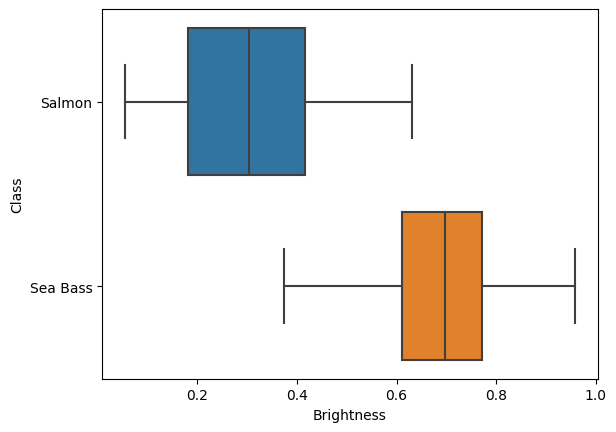

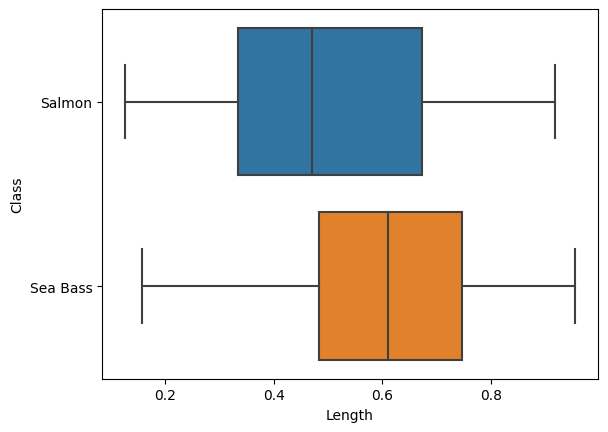

<Figure size 640x480 with 0 Axes>

In [17]:
for curr_feature_name in feature_names:
    sns.boxplot(data=fish_data, x=curr_feature_name, y=label_name)
    plt.figure() #We need to call plt.figure for every property - else it would be drawn in the same figure.

## Histograms

A _histogram_ is a graphical representation of the distribution of a dataset. Although its appearance is similar to that of a standard bar graph, instead of making comparisons between different items or categories, a histogram is a plot that lets you show the underlying frequency distribution.

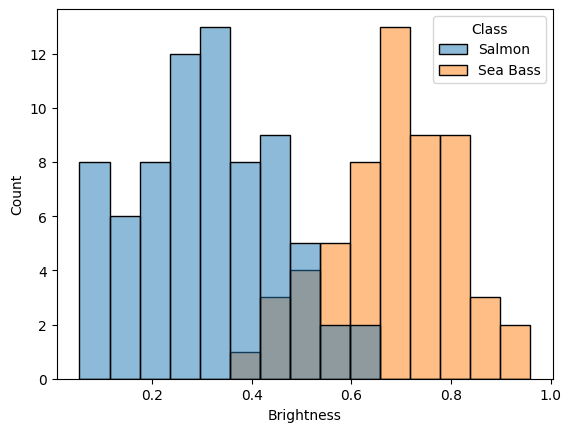

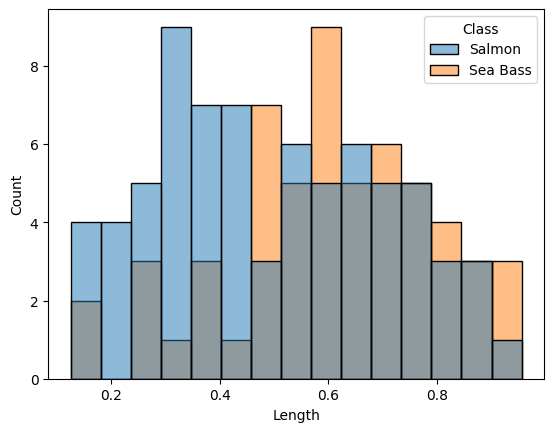

<Figure size 640x480 with 0 Axes>

In [18]:
for curr_feature_name in feature_names:
    sns.histplot(data=fish_data, x=curr_feature_name, hue=label_name, bins=15)
    plt.figure()

## Scatter Plots

_Scatter plots_ are a commonly used data visualization technique. They allow us to identify and determine if there is a relationship (_correlation_) between two variables and the strength of that relationship.

<Axes: xlabel='Brightness', ylabel='Length'>

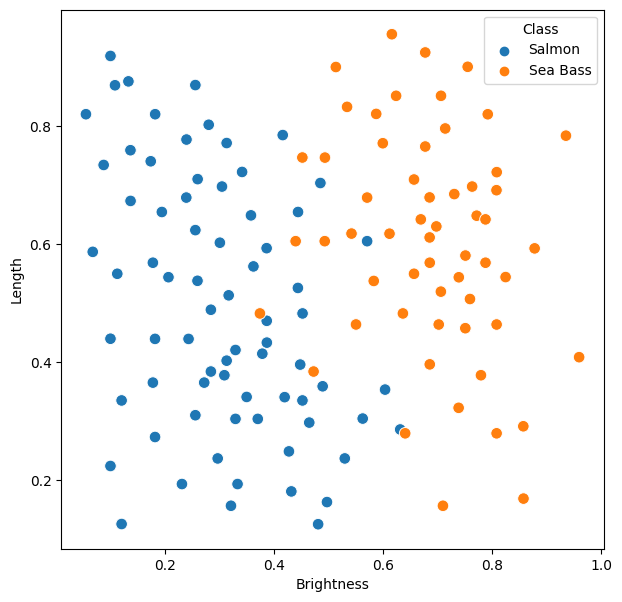

In [19]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=fish_data, x=feature_names[0], y=feature_names[1], hue=label_name, s=70)

# Classification

Let's finally get down to business: How can we _teach_ the computer to **_classify_** our two fish types by the given properties?

First we need to talk about some important vocabulary:

* The teaching process is called **_training_**. We feed a **_machine learning algorithm_** with **_training data_**.
* The **_features_** are the _input_ we use for our prediction - in our case we want to determine the fish type according to the length and brightness. Since the data is usually stored in a matrix, it has become common practice to use an upper case `X` for it.
* The **_target_** or **_label_** can be seen as the _output_ of our prediction - in our case that's either _salmon_ or _sea bass_. Since the data is usually stored in a vector, it has become common practice to use a lower case `y` for it.
* A _machine learning algorithm_ finds patterns in the training data such that the _features_ correspond to the _target_. The output of the training process is a **_machine learning model_**.
* A _machine learning model_ can then be used for making **_predictions_** based on _features_.

N.B.: Unfortunately the plotting library we use for this demonstration can only handle numerical targets. We're using the `LabelEncoder` for a simple transformation (i.e. back to `0` and `1`) - don't worry, we'll handle that process in detail later on.

In [20]:
X = fish_data[feature_names]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(fish_data[label_name])

The _labels_ now look like this:

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Now that we defined the training data in the variables `X` and `y` we can finally train our model! For this demonstration we'll be using a _Support Vector Machine_ or _SVM_ in short. While being fairly complex the general idea is simple: The algorithm creates a line or a hyperplane which separates the data into classes while trying to maximize the margin between the line and the points, thus finding the ideal separator.

Let's try out the _Support Vector Classification_-implementation `SVC` from the `sklearn`-library with a _linear_ kernel for the start. After creating the object we'll be using the `fit` method to _train_ the _model_ using the _training data_.

In [22]:
svm_model1 = SVC(kernel='linear', C=10)
svm_model1.fit(X=X, y=y)

SVC(C=10, kernel='linear')

Now that was quite easy! Let's see what our model _learned_ from the data by visualizing it:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

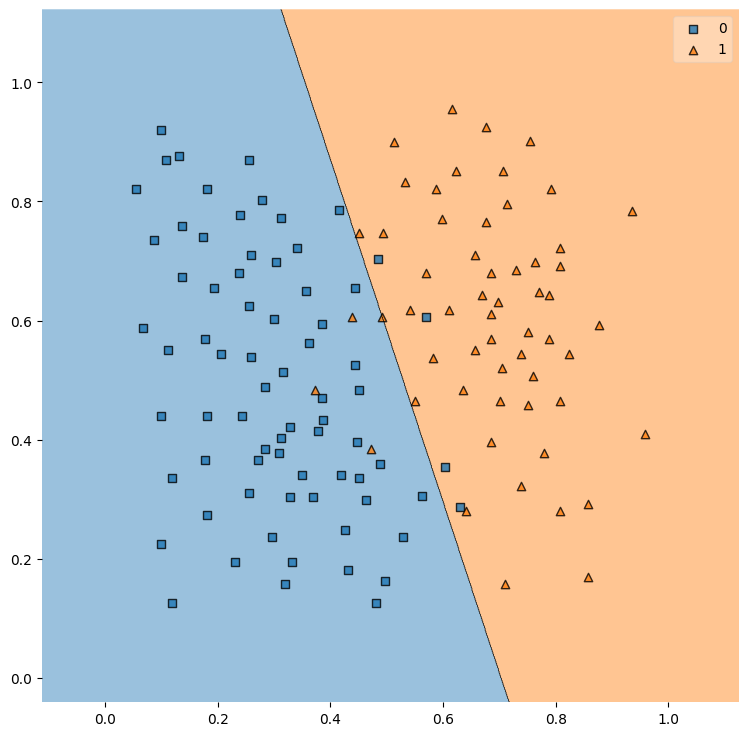

In [23]:
plt.figure(figsize=(9,9))
plot_decision_regions(X=X.to_numpy(dtype=float), y=y, clf=svm_model1, zoom_factor=6)

What do you think of the result?

As you probably guessed, a _linear SVM_ is used, when we have a linearly separable set of data points - e.g. in two-dimensional space we can separate them by a straight line. When we need curve-shaped boundaries we can use the popular _Radial Basis Function_-kernel. Let's try it out:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

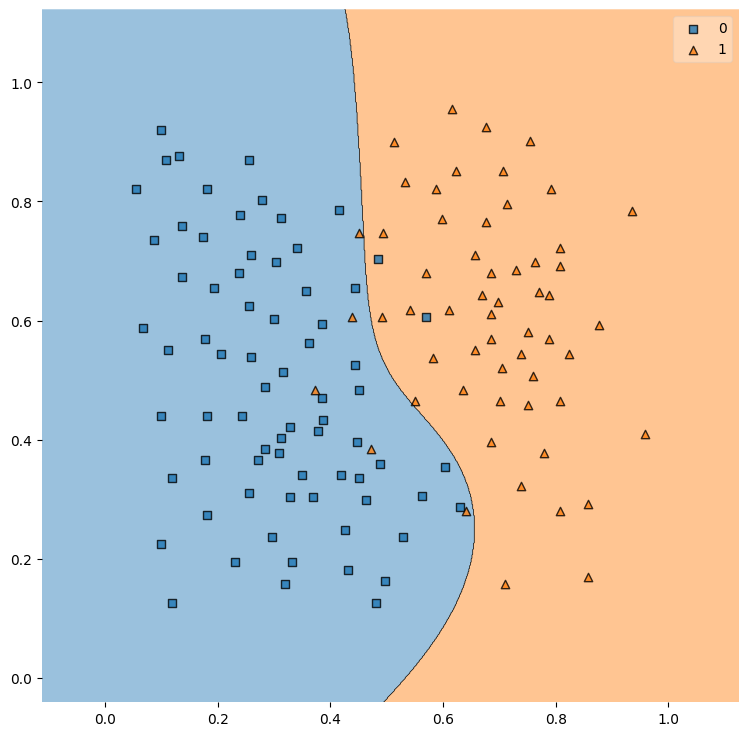

In [24]:
svm_model2 = SVC(kernel='rbf', C=20)
svm_model2.fit(X=X, y=y)

plt.figure(figsize=(9,9))
plot_decision_regions(X=X.to_numpy(dtype=float), y=y, clf=svm_model2, zoom_factor=6)

By now you're probably asking yourself about the parameters we're passing to the constructor. In general, the parameters we use to control the learning process are called **_hyperparameters_**. While the `kernel` _hyperparameter_ should be obvious by now, let's take a look at `C`:

The `C` parameter is referred as the **_regularization_** parameter. In general, regularization means to make things regular or acceptable - thus discouraging learning a more complex model. So in other words, the parameter tells the _SVM_ optimization how much you want to avoid misclassifying each training example. For large values of `C`, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of `C` will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

That sounds worth trying out! Let's try increasing the `C` parameter to a very high value:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

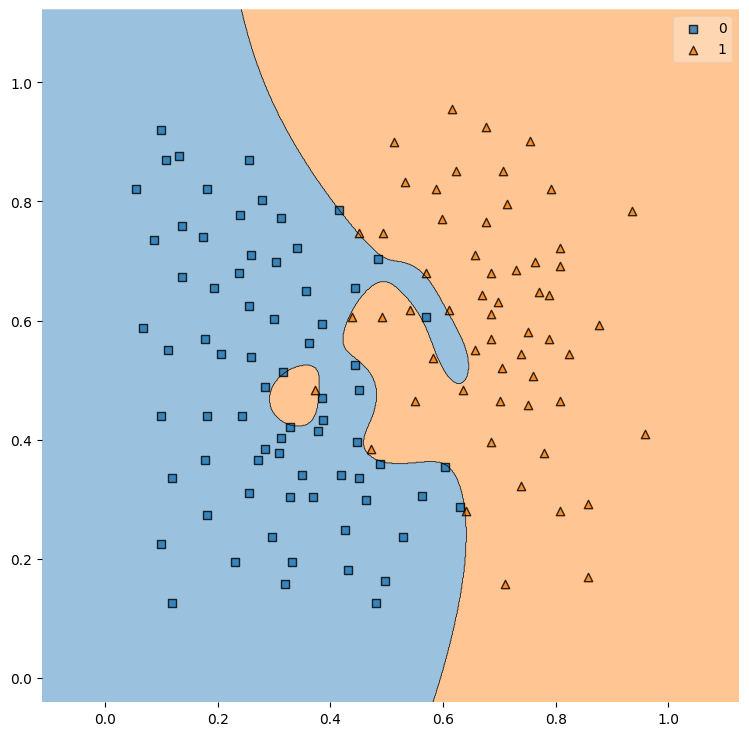

In [25]:
svm_model3 = SVC(kernel='rbf', C=10000000000000)
svm_model3.fit(X=X, y=y)

plt.figure(figsize=(9,9))
plot_decision_regions(X=X.to_numpy(dtype=float), y=y, clf=svm_model3, zoom_factor=6)

Now that seems pretty perfect! Or does it...?

# Evaluation
Evaluating our model(s) is an essential part of any machine learning project. Let's take a look at the performance of our last model, which seemed pretty perfect. We start by *__predicting__* the target values using a set of data:

In [26]:
y_pred = svm_model3.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

A simple measure we can use to evaluate the performance is the *__accuracy__*, which can be calculated as follows:

$$\text{Accuracy} = \frac{\text{Number Of Correct Predictions}}{\text{Total Number Of Predictions Made}} $$

Conveniently, `sklearn` provides a method we can use to calculate the _accuracy_:

In [27]:
accuracy_score = metrics.accuracy_score(y_pred, y)
print("Accuracy: {:.2f}%".format((accuracy_score*100)))

Accuracy: 100.00%


Wow, 100%! Seems to good to be true? Because it is.

Our algorithm saw the whole dataset when learning - and seems to perform really well when predicting the same data points. Unfortunately, we have no idea how the model **_generalizes_** to new data it hasn't seen before.

Imagine teaching a child some simple additions: $1+2=3$, $3+4=7$ and $1+3=4$. If we ask the child to solve $3+4$ afterwards, can we really tell if it _understood_ additions rather than simply memorizing the examples?

A common, simple strategy for a better evaluation is **_splitting_** the dataset into two parts:

* **_Training data_** is used for _fitting_ the model to the data.
* **_Testing data_** is withheld from the algorithm when training - thus allowing an unbiased evaluation of the model.

Conveniently, we have another method in the `sklearn` library that we can use: `train_test_split`. Apart from the dataset (in `X` and `y`) we can pass the desired ratio of the _testing data_ - we'll go with a 70%/30% split as often suggested in literature, though this is debatable - and a _random state_. Latter optional parameter is the seed for the random generator used when splitting, allowing us to work with reproducible results.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

array([<Axes: ylabel='0'>], dtype=object)

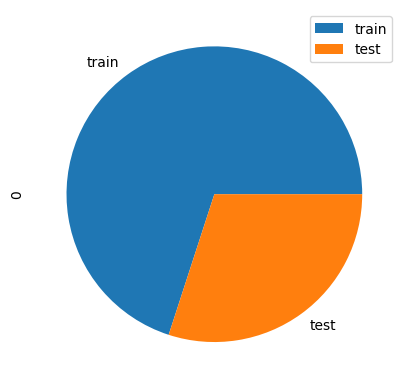

In [29]:
pd.DataFrame([len(y_train), len(y_test)], index=['train', 'test']).plot(kind='pie', subplots=True)

Let's use our splitted dataset to evaluate the accuracy of the models we have trained so far:

In [30]:
svm_models = [svm_model1, svm_model2, svm_model3]

for curr_svm_model in svm_models:
    curr_svm_model.fit(X=X_train, y=y_train)

    y_pred = curr_svm_model.predict(X_test)

    accuracy_score = metrics.accuracy_score(y_pred, y_test)

    print("SVM with kernel: {}, C: {}".format(curr_svm_model.kernel, curr_svm_model.C))
    print("Accuracy: {:.2f}%".format((accuracy_score*100)))
    print("--------------------------------")

SVM with kernel: linear, C: 10
Accuracy: 92.31%
--------------------------------
SVM with kernel: rbf, C: 20
Accuracy: 94.87%
--------------------------------
SVM with kernel: rbf, C: 10000000000000
Accuracy: 87.18%
--------------------------------


Now we got a more realistic view on the performance of our models. While both our _SVMs_ with _straighter_ lines perform reasonably well, the model that reached 100% above falls behind. But why is that?

## Overfitting And Underfitting

**_Overfitting_** is a concept in data science, which occurs when a statistical model fits exactly against its training data. When this happens, the algorithm unfortunately cannot perform accurately against unseen data, defeating its purpose. Generalization of a model to new data is ultimately what allows us to use machine learning algorithms every day to make predictions and classify data.

On the opposite, **_underfitting_** is a scenario in data science where a data model is unable to capture the relationship between the input and output variables accurately, generating a high error rate on both the training set and unseen data. It occurs when a model is too simple, which can be a result of a model needing more training time, more input features, or less regularization. Like overfitting, when a model is underfitted, it cannot establish the dominant trend within the data, resulting in training errors and poor performance of the model.

The following image (source: _IBM_) should clarify these concepts:

<img align="left"
src="https://drive.google.com/uc?export=view&id=1-wDDRQKz-zMJpKWNSwNs3RJ-YQ08Tjm2">

# Conclusion

Hopefully this demonstration gave you a brief insight into the process when solving machine learning problems - and made you eager for diving deeper into the topic. Take another look at the **_vocabulary in bold_** and make sure you have a basic comprehension of the concepts described.

And above all: Have fun in this course!